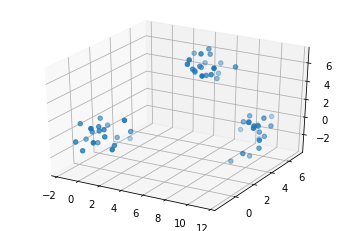

In [1]:
import numpy as np
import matplotlib.pyplot as plt

points = [np.random.randn(3) for _ in range(20)]
points.extend([np.random.randn(3) + np.array([5,5,5]) for _ in range(20)])
points.extend([np.random.randn(3) + np.array([10,5,0]) for _ in range(20)])

points = np.array(points)


fig = plt.figure()
ax = fig.gca(projection='3d')

X = points[:,0]
Y = points[:,1]
Z = points[:,2]

ax.scatter(X,Y,Z)
plt.show()

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[[ 0.33875766 -0.02890093 -0.06697816]
 [ 5.1169812   5.25474265  5.47113331]
 [10.13467653  4.70020619 -0.42772457]]


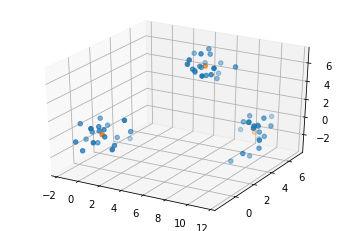

In [2]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(points)

print(kmeans.labels_)
print(kmeans.cluster_centers_)

centroids = kmeans.cluster_centers_

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.scatter(points[:,0], points[:,1], points[:,2])
ax.scatter(centroids[:,0], centroids[:,1], centroids[:,2])
plt.show()

In [3]:
def euclidean_distance(a,b):
    return ((a - b) ** 2).sum() ** 0.5


def kmeans(points, k , max_iters = 10):
  # 1. cluster centers를 랜덤하게 생성한다. forgy : 있는 점 중에서 랜덤하게 k개를 골라서 초기 cluster center로 설정
  cluster_centers = points[np.random.choice(n_points, k, replace=False)]


  for iter in range(max_iters):
    # 2. 각각의 점마다 어떤 cluster center와 가장 가까운지 계산 및 할당

    labels = []

    for p in points:
      min_dist = np.inf
      min_cid = -1
      for cid, c in enumerate(cluster_centers):
        dist = euclidean_distance(p,c)
        if dist < min_dist:
          min_dist = dist
          min_cid = cid
      labels.append(min_cid)

    labels = np.array(labels)

    # 3. 새로운 labels을 이용해서 cluster_center 새로 계산

    cluster_centers
    new_cluster_centers = np.zeros_like(cluster_centers)
    counts = np.zeros(k)

    for l, p in zip(labels, points):
      new_cluster_centers[l] += p
      counts[l] += 1

    for i in range(k):
      new_cluster_centers[i] /= counts[i]


    print("iteration #", iter)

    # 4. 같은 클러스터에 속한 점들 (aka 같은 cluster_center와 가장 가까운 점들)을 평균내고싶다!

    if np.array_equal(cluster_centers, new_cluster_centers):
      break
    else:
      cluster_centers = new_cluster_centers
    
  
  return labels, cluster_centers




In [4]:
k = 3
max_iters = 10
n_points = points.shape[0]



iteration # 0
iteration # 1
iteration # 2


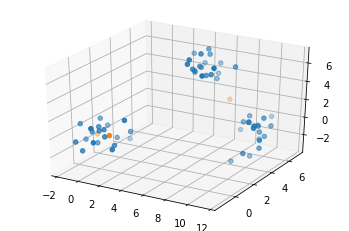

In [6]:
lables, cluster_centers = kmeans(points,3)

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.scatter(points[:,0], points[:,1], points[:,2])
ax.scatter(cluster_centers[:,0], cluster_centers[:,1], cluster_centers[:,2])
plt.show()

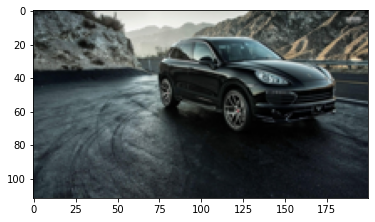

In [8]:
from PIL import Image

img = Image.open("/content/sample_data/porsche cayyen.jpg")

width = 200
height = img.height*width // img.width

img = img.resize((width,height))

plt.imshow(img)
plt.show()

In [11]:
pixels = np.array(img).reshape(width*height,3).astype(np.float32)


labels, cluster_centers = kmeans(pixels,10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide


iteration # 0
iteration # 1
iteration # 2
iteration # 3
iteration # 4
iteration # 5
iteration # 6
iteration # 7
iteration # 8
iteration # 9


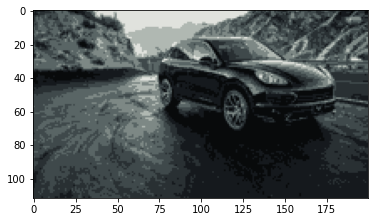

In [12]:
for l, i in zip(labels, range(pixels.shape[0])):
  pixels[i] = cluster_centers[l]


pixels = pixels.astype(np.uint8)

im_remastered = Image.fromarray(pixels.reshape((height,width,3)), 'RGB')
plt.imshow(im_remastered)
plt.show()